## Kmeans

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

# X, y_true = make_blobs(n_samples=1500, centers=4,
#                        cluster_std=0.60, random_state=0)
n_samples = 1500
X, y = make_blobs(n_samples = n_samples,centers = 4, cluster_std = 0.6,random_state = 42)

In [15]:
class KMeans:
    def __init__(self, k, max_iter=100):
        self.k = k
#         self.batch_size = batch_size
        self.max_iter = max_iter
    
    def fit(self, X):
        m, n = X.shape

        #1. randomly choose n clusters from X
        #you can also randomly generate any two points
        rng = np.random.RandomState(0) #### RANDOMSTATE change to 0, initially it was 42
        i = rng.permutation(m)[:self.k]
        '''
        take the first 4 random nummbers 
        (since we have only 4 clusters) 
        we will initialze the centres using the 4 random samples from our samples
        '''
    #     print('i: ',i)
        self.centers = X[i]
    #     ceters1 = X[i[1]]
    #     print('test',ceters1)
    #     print(centers)

        iteration = 0

        while True:
            #2. assign lables based on closest center
            #return the index of centers having smallest
            #distance with X
            labels = pairwise_distances_argmin(X, self.centers) # all X's and their centres
    #         print('labels: ', set(labels))

            #3. find new centers
            new_centers = [] 
            for i in range(self.k):
                new_centers.append(X[labels == i].mean(axis=0))
    #         print('new_centers: ', new_centers)

            #convert list to np.array; you can actually combine #3
            #with np.array in one sentence 
            new_centers = np.array(new_centers)

            #plotting purpose
            #plot every 5th iteration to save space
            #remove this if, if you want to see each snapshot
            if (iteration % 5 == 0):
                pred = pairwise_distances_argmin(X, new_centers)
                plt.figure(figsize=(5, 2))
                plt.title(f"Iteration: {iteration}")
                plt.scatter(X[:, 0], X[:, 1], c=pred)
                plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

            #4 stopping criteria - if centers do not 
            #change anymore, we stop!
            if(np.allclose(self.centers, new_centers)):
                break
            else:
                self.centers = new_centers
                iteration+=1

        print(f"Done in {iteration} iterations")

        #compute total within-variation score
        total_with_variation_score = 0
        labels = pairwise_distances_argmin(X, self.centers) #<---Note I use X here.  Why?
        for i in range(self.k):
            cluster_mean = X[labels==i].mean(axis=0)
            total_with_variation_score += ((X[labels==i] - cluster_mean)** 2).sum()

        print("Total with variation score: ", total_with_variation_score)
        self.distortion = total_with_variation_score
        return self.centers

    def predict(self, X):
        return pairwise_distances_argmin(X, self.centers)
    


=====k = 2
Done in 3 iterations
Total with variation score:  45503.661906178146
Fit and predict time 0.03700375556945801
=====k = 3
Done in 2 iterations
Total with variation score:  8992.325672749414
Fit and predict time 0.032486915588378906
=====k = 4
Done in 4 iterations
Total with variation score:  1049.7443879774848
Fit and predict time 0.0338282585144043
=====k = 5
Done in 11 iterations
Total with variation score:  957.7932681400146
Fit and predict time 0.07687067985534668
=====k = 6
Done in 24 iterations
Total with variation score:  900.9256085798265
Fit and predict time 0.11148762702941895


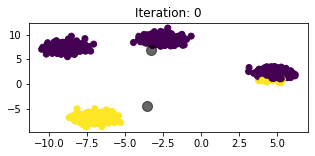

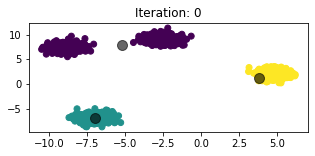

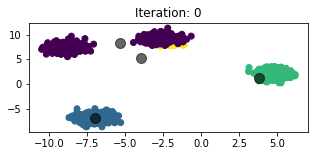

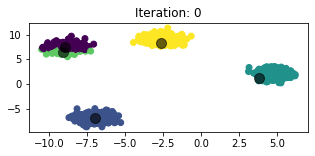

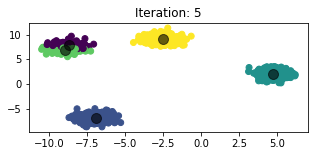

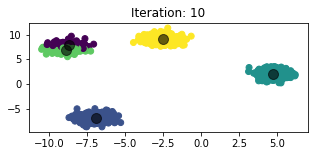

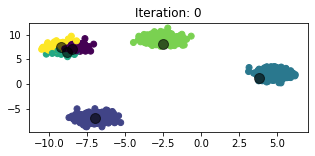

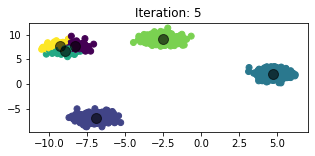

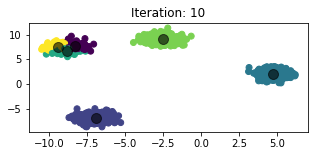

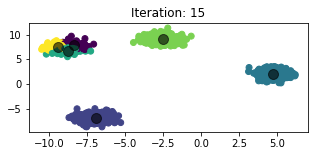

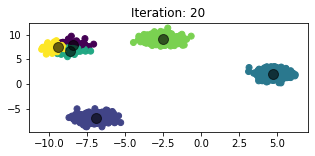

In [16]:
#main code
distortion = []
for k in range(2, 7):
    print(f"=====k = {k}")
    start = time()
    model = KMeans(k)
    model.fit(X)
    distortion.append(model.distortion)
    preds = model.predict(X)
    print(f"Fit and predict time {time() - start}")

In [17]:
# self

[45503.661906178146, 8992.325672749414, 1049.7443879774848, 957.7932681400146, 900.9256085798265]


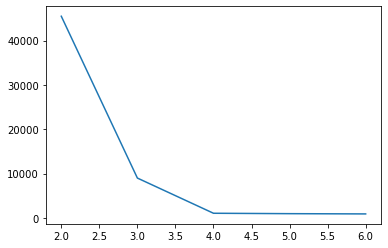

In [18]:
k = np.arange(2,7)
print(distortion)
plt.plot(k,distortion)

### Kmeans

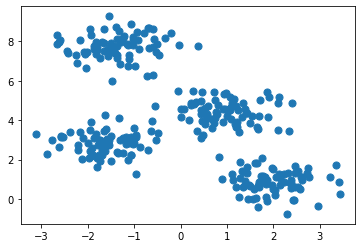

In [21]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [22]:
from sklearn.cluster import KMeans

#How did I know there are n_clusters = 4 (because I cheat!  But what if I don't know in advance?)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[0 2 1 2 0 0 3 1 2 2 3 2 1 2 0 1 1 0 3 3 0 0 1 3 3 1 0 1 3 1 2 2 1 2 2 2 2
 2 3 0 1 3 1 1 3 3 2 3 2 0 3 0 2 0 0 3 2 3 2 0 2 1 2 3 3 3 2 0 2 3 1 3 2 3
 3 2 3 1 0 2 0 1 0 0 2 1 0 1 2 2 1 0 2 3 3 1 0 0 1 3 2 0 2 0 1 0 0 1 2 1 3
 3 0 2 0 1 2 0 0 1 3 0 3 0 0 0 0 3 0 3 2 3 3 0 2 3 3 2 1 2 2 3 1 3 1 3 2 1
 2 2 2 1 2 1 0 3 2 3 0 1 2 1 1 0 1 3 3 1 0 1 1 2 0 1 3 2 0 0 1 3 0 1 3 3 1
 1 1 1 0 2 1 3 1 1 3 3 3 1 3 2 1 3 0 3 1 2 3 2 1 2 1 3 1 1 2 3 3 0 0 1 2 0
 0 3 0 3 1 2 2 1 1 2 1 0 3 1 0 3 2 3 0 1 0 2 2 2 2 3 3 2 1 3 0 1 3 3 3 0 0
 2 1 1 3 0 2 3 1 2 1 0 0 3 3 1 0 0 0 1 2 2 0 0 1 0 0 0 2 3 2 1 0 0 2 2 2 0
 0 1 2 3]


Centers:  [[ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]]


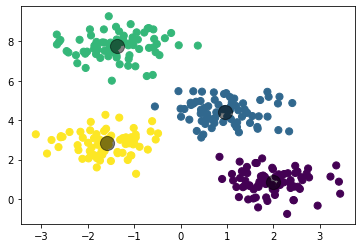

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print("Centers: ", centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### How many clusters? ".inertia_"

'\n4 Clusters could be good. Why not 19 then?  Because 4 got a good balance between within-sum of squared distances,\nand the number of clusters.  Having way too many clusters with little gain of the within-sum will increase\ncomputation time.\n'

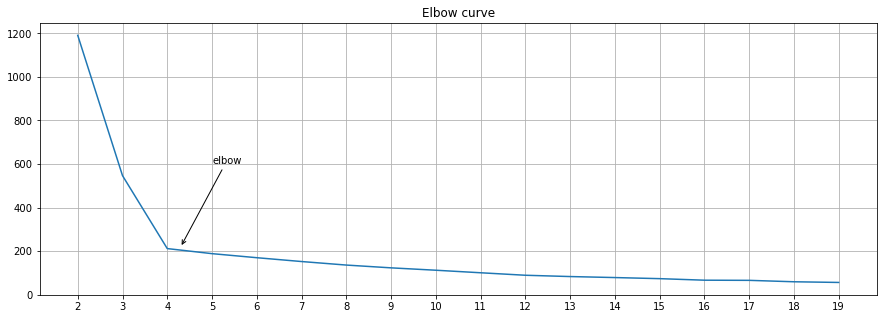

In [24]:
#sum of squared distances
ssd = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), ssd)
plt.xticks(range(2, 20))
plt.grid(True)
plt.title('Elbow curve')

plt.annotate('elbow', xy=(4.3, 220), xytext=(5, 600),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))

'''
4 Clusters could be good. Why not 19 then?  Because 4 got a good balance between within-sum of squared distances,
and the number of clusters.  Having way too many clusters with little gain of the within-sum will increase
computation time.
'''


In [25]:
# Test digits

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

In [28]:
print(clusters.shape)
print(set(clusters))

(1797,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


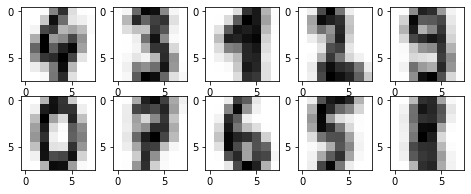

In [29]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, cmap=plt.cm.binary)

Accuracy score:  0.7952142459654981


Text(433.5, 0.5, 'True')

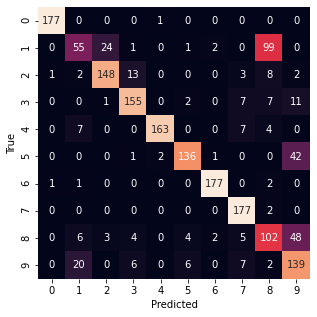

In [30]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #mode to get the most correctly classified
    pred[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(digits.target, pred))
mat = confusion_matrix(digits.target, pred)
plt.figure(figsize=(16, 5))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")

In [36]:
print(pred)
print(len(pred))
print(clusters.shape)
print(clusters)

[0 1 8 ... 8 9 8]
1797
(1797,)
[1 8 0 ... 0 7 0]


In [32]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, random_state=0)
projected_X = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(projected_X)

# Permute the labels
pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    pred[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, pred)

#yay, after cleaning some noise, we got even higher accuracy!

0.9371174179187535